In [61]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error



In [62]:
 %pip install statsmodels
 %pip install sklearn
 %pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRE

In [63]:
data = pd.read_csv('gapminder.csv').dropna()

data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [64]:
continent = pd.get_dummies(data['continent'], drop_first=True).astype(int)
data = pd.concat([data,continent], axis=1)

data.head()



,country,continent,year,lifeExp,pop,gdpPercap,Americas,Asia,Europe,Oceania
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,0,1,0,0
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,0,1,0,0
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,0,1,0,0
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,0,1,0,0
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,0,1,0,0


In [65]:
inputs = ['pop','gdpPercap','year','Americas','Asia','Europe','Oceania']
data[inputs].corr()

,pop,gdpPercap,year,Americas,Asia,Europe,Oceania
pop,1.000000,-0.025600,8.230808e-02,-2.219817e-02,2.459466e-01,-6.062454e-02,-2.334280e-02
gdpPercap,-0.025600,1.000000,2.273181e-01,-3.715837e-03,3.834877e-02,3.809787e-01,1.383432e-01
year,0.082308,0.227318,1.000000e+00,-1.574294e-15,2.402565e-15,2.118443e-15,-6.039044e-15
Americas,-0.022198,-0.003716,-1.574294e-15,1.000000e+00,-2.543436e-01,-2.392372e-01,-5.524946e-02
Asia,0.245947,0.038349,2.402565e-15,-2.543436e-01,1.000000e+00,-2.847707e-01,-6.576498e-02
Europe,-0.060625,0.380979,2.118443e-15,-2.392372e-01,-2.847707e-01,1.000000e+00,-6.185896e-02
Oceania,-0.023343,0.138343,-6.039044e-15,-5.524946e-02,-6.576498e-02,-6.185896e-02,1.000000e+00


In [66]:
train, test = train_test_split(data, test_size=0.3, random_state=2024)

In [67]:
model = sm.OLS(train['lifeExp'],train[inputs]).fit()
# OLS - ordinary least squared

Text(0, 0.5, 'Actual')

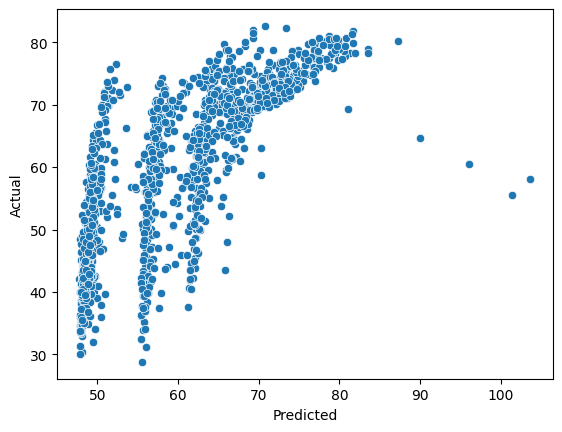

In [68]:
sns.scatterplot(y=train['lifeExp'],x=model.predict(train[inputs]))
plt.xlabel('Predicted')
plt.ylabel('Actual')
# not linear at all
# look for the types of error being made
# look at couple of inputs in data and see how far are we for a given input (residuals/errors)

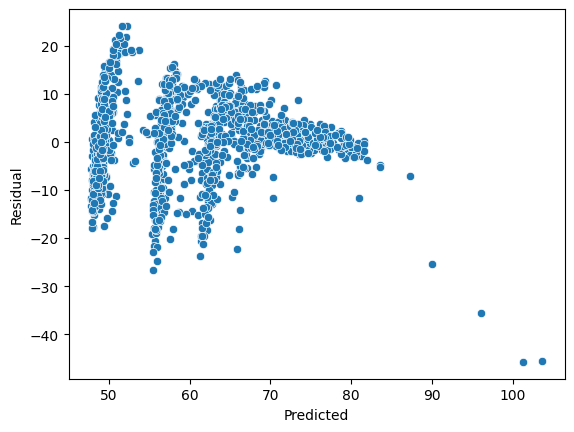

In [69]:
residuals = train['lifeExp'] - model.predict(train[inputs])
sns.scatterplot(x=model.predict(train[inputs]),y=residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()
# if it is random, it is a good thing
# if it is not random, there's something we didn't accounted for

<Axes: xlabel='gdpPercap', ylabel='None'>

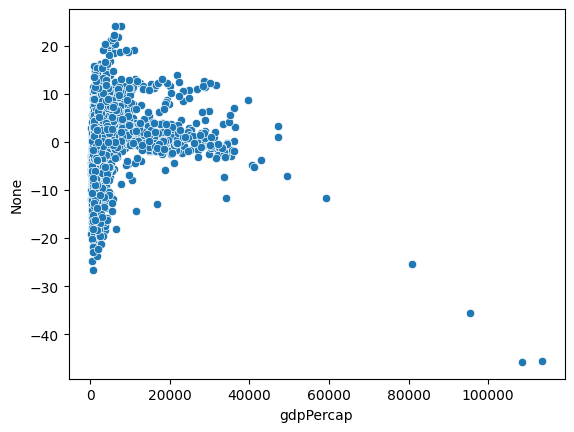

In [70]:
residuals = train['lifeExp'] - model.predict(train[inputs])
sns.scatterplot(x=train['gdpPercap'],y=residuals)
# heteroskedatic: fan out shape

<Axes: xlabel='gdpPercap', ylabel='lifeExp'>

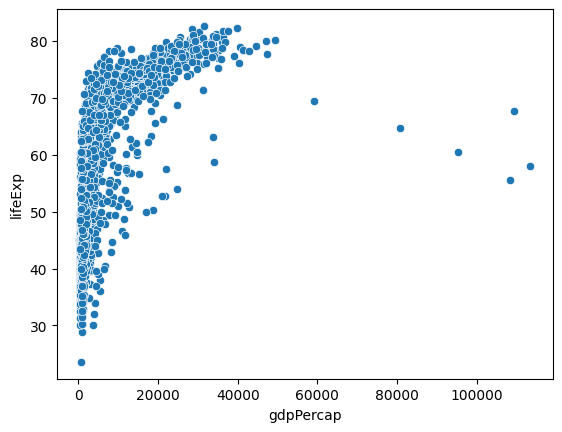

In [71]:
sns.scatterplot(x=data['gdpPercap'],y=data['lifeExp'])
# logitharmic relationship

<Axes: xlabel='gdpPercap', ylabel='lifeExp'>

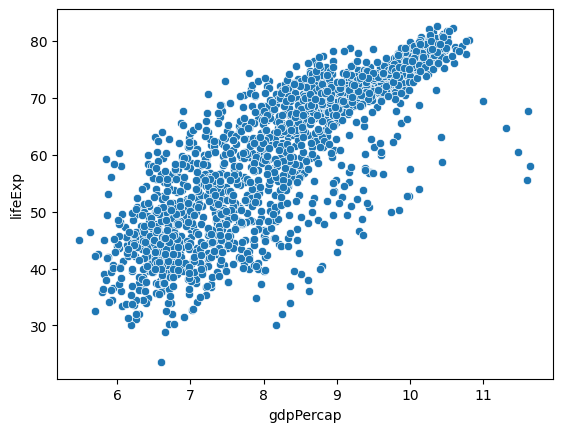

In [72]:
sns.scatterplot(x=np.log(data['gdpPercap']),y=data['lifeExp'])

In [73]:
data['gdpPercap'] = np.log(data['gdpPercap'])
data['pop'] = np.log(data['pop'])

data['year'] = data['year'] - 1952

In [74]:
train, test = train_test_split(data, test_size=0.3, random_state=2024) 

In [75]:
model = sm.OLS(train['lifeExp'],train[inputs]).fit()

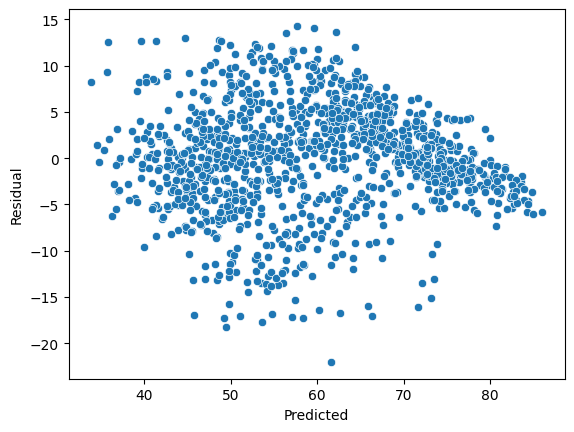

In [76]:
residuals = train['lifeExp'] - model.predict(train[inputs])
sns.scatterplot(x=model.predict(train[inputs]),y=residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

In [77]:
print(mean_absolute_error(y_true=train['lifeExp'],y_pred=model.predict(train[inputs])))
print(mean_absolute_error(y_true=test['lifeExp'],y_pred=model.predict(test[inputs])))

4.398039801468951
4.582374627265792


In [ ]:
print(model.summary())
# Prob (F-Statistics) explain if the event is due to chance
# if low, the model is significant, so happen not due to chance
# reject null hypothesis (what we assume is true) using P>|t|
# want <5% chance p <= 0.05 is prefer (not due to chance

                                 OLS Regression Results                                
Dep. Variable:                lifeExp   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.907e+04
Date:                Thu, 13 Mar 2025   Prob (F-statistic):                        0.00
Time:                        18:01:55   Log-Likelihood:                         -3768.5
No. Observations:                1192   AIC:                                      7551.
Df Residuals:                    1185   BIC:                                      7587.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------